In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MultipleRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X to account for the intercept
        x_with_intercept = np.column_stack((np.ones(len(X)), X))

        # Initialize the random coefficients
        self.coef_ = np.random.randn(x_with_intercept.shape[1])

        # Gradient descent
        for _ in range(self.n_iter):
            gradient = -2 * x_with_intercept.T @ (y - (x_with_intercept @ self.coef_))
            self.coef_ -= self.learning_rate * gradient

        # The first coefficient is the intercept
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        # Add a column of ones to X to account for the intercept
        x_with_intercept = np.column_stack((np.ones(len(X)), X))
        
        return x_with_intercept @ np.concatenate(([self.intercept_], self.coef_))


In [24]:
X = np.array([[1, 2], [2, 4], [3, 1], [4, 0], [5, 3]])

y = np.array([2, 3, 4, 5, 6])

modelo = MultipleRegression(learning_rate=0.01, n_iter=1000)

modelo.fit(X, y)

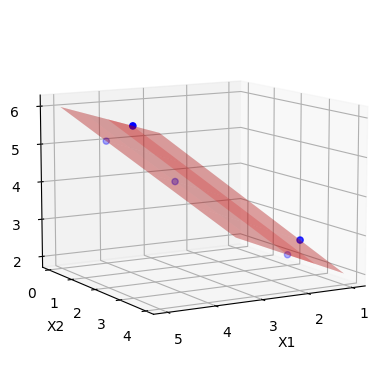

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

xx, yy = np.meshgrid(X[:, 0], X[:, 1])
zz=modelo.intercept_ + modelo.coef_[0]*xx + modelo.coef_[1]*yy
ax.plot_surface(xx, yy, zz, color = 'r', alpha = 0.2)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.azim = 60
ax.elev = 10

In [26]:
print("Intercept: ", modelo.intercept_)
print("Coef: ", modelo.coef_)

nuevos_datos = np.array([[5, 4], [3, 4]])
predicciones = modelo.predict(nuevos_datos)
print("Predicciones: ", predicciones)

ax.scatter(nuevos_datos[:, 0], nuevos_datos[:, 1], predicciones, color='g', marker='o')

plt.show()

Intercept:  0.9999943416657333
Coef:  [1.00000112e+00 8.59042606e-07]
Predicciones:  [6.00000336 4.00000113]
